In [1]:
import numpy as np
import pandas as pd
df = pd.read_csv('diamond.csv',sep=',')
df.sample(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
7965,1.09,Premium,G,SI1,62.5,59.0,4322,6.56,6.53,4.09
36248,0.41,Ideal,E,VS2,62.5,55.0,935,4.74,4.77,2.97
6783,1.13,Fair,H,SI2,64.4,58.0,4113,6.59,6.51,4.22
30617,0.30,Very Good,G,SI1,59.7,60.0,447,4.35,4.39,2.61
19521,1.00,Premium,G,VVS1,62.1,59.0,8154,6.40,6.29,3.94


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [3]:
df['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [4]:
df['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [5]:
df['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

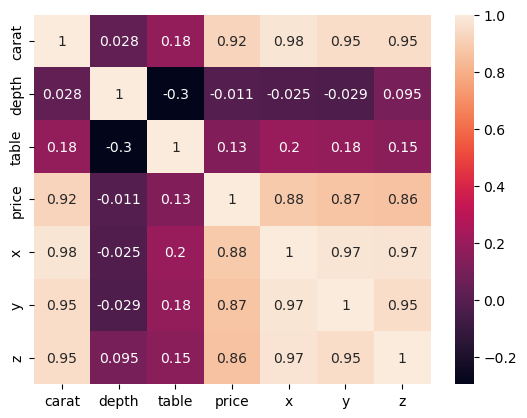

In [6]:
import seaborn as sns
num = ['carat', 'depth', 'table', 'price', 'x', 'y','z' ]
hm = sns.heatmap(df[num].corr(),annot=True)

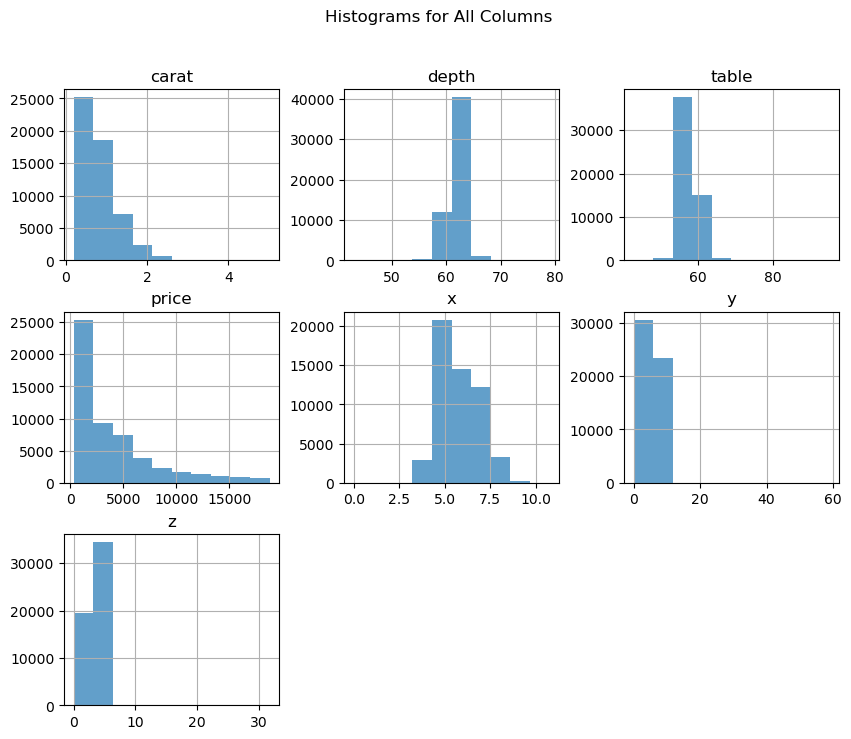

TypeError: 'NoneType' object is not callable

In [7]:
from matplotlib import pyplot as plt
df.hist(figsize=(10, 8), bins=10, alpha=0.7)
plt.suptitle('Histograms for All Columns')
plt.show()()

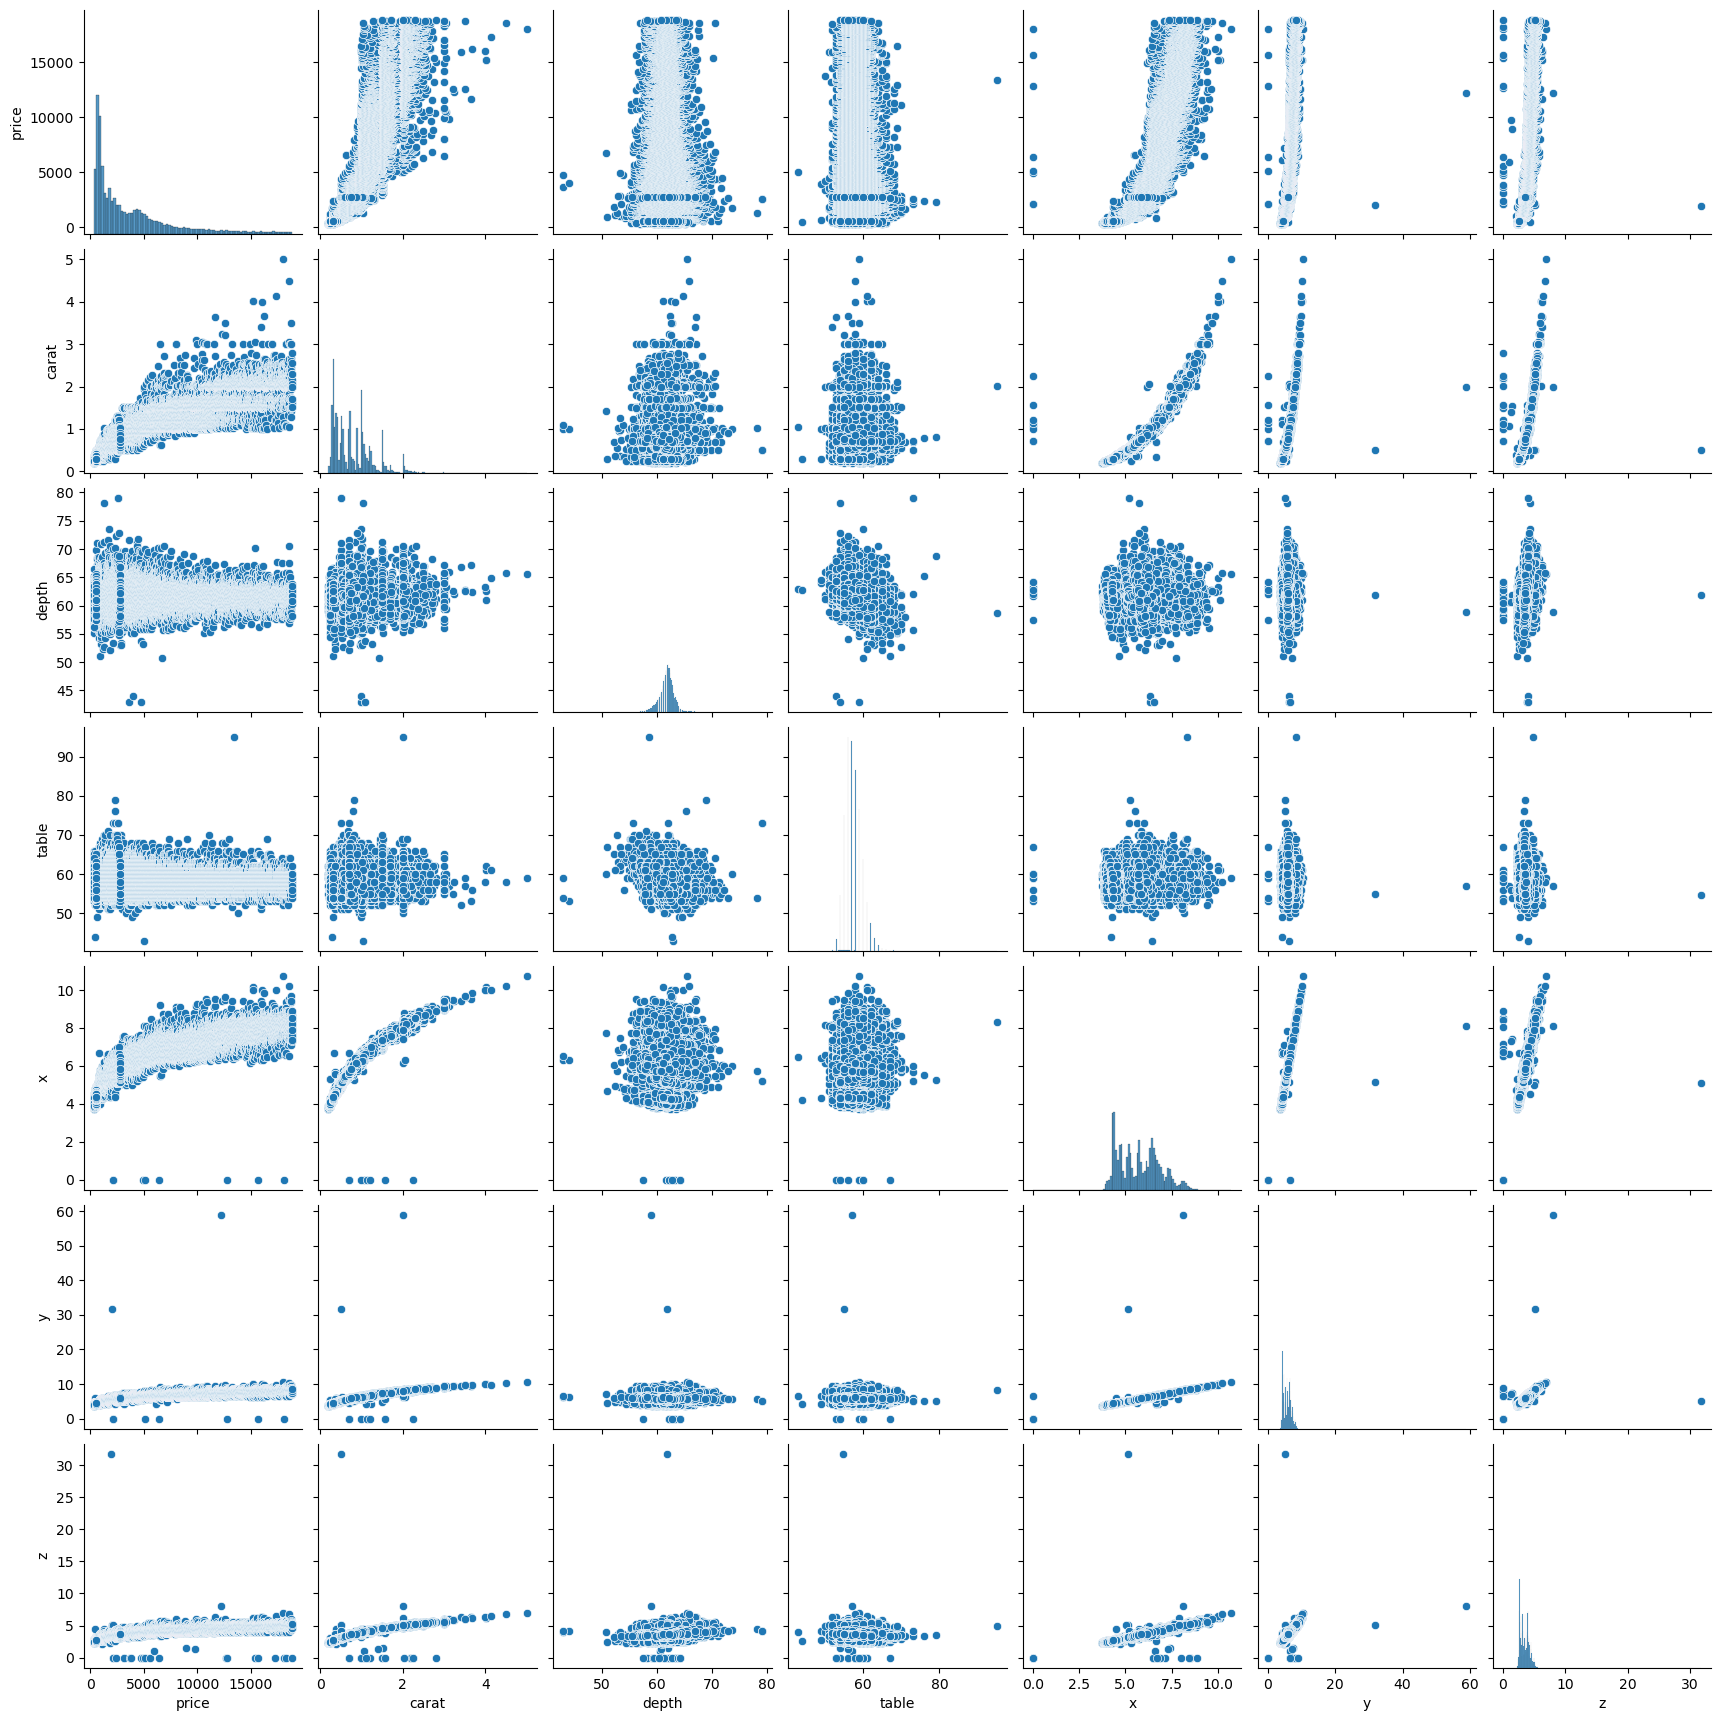

In [9]:
import seaborn as sns
col = ['price','carat', 'depth', 'table', 'x', 'y','z']
sns.pairplot(df.loc[:,col])

In [8]:
df.groupby('cut')[['price']].mean()

,price
cut,
Fair,4358.757764
Good,3928.864452
Ideal,3457.541970
Premium,4584.257704
Very Good,3981.759891


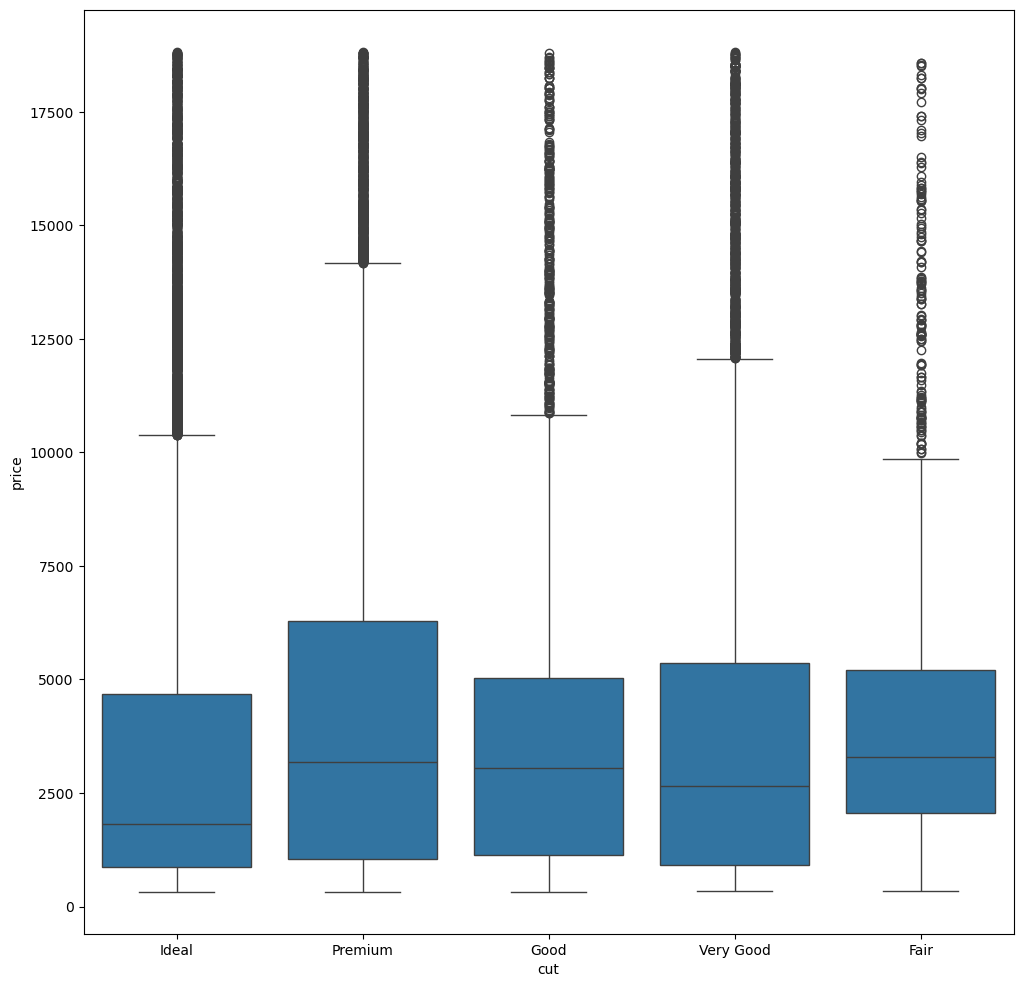

In [9]:
f, ax = plt.subplots(figsize=(12, 12))
fig = sns.boxplot(x='cut', y='price', data=df)

In [10]:
df.groupby('cut')[['price']].count()

,price
cut,
Fair,1610
Good,4906
Ideal,21551
Premium,13791
Very Good,12082


In [11]:
import scipy
import scipy.stats as stats
df_d1=np.array(df[df['cut']=='Ideal']['price'])
df_d2=np.array(df[df['cut']=='Premium']['price'])
df_d3=np.array(df[df['cut']=='Good']['price'])
df_d4=np.array(df[df['cut']=='Very Good']['price'])
df_d5=np.array(df[df['cut']=='Fair']['price'])
print(stats.shapiro(df_d1))
print(stats.shapiro(df_d2))
print(stats.shapiro(df_d3))
print(stats.shapiro(df_d4))
print(stats.shapiro(df_d5))
stats.mstats.kruskalwallis(df_d1,df_d2,df_d3,df_d4,df_d5)

C:\ProgramData\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 21551.
  res = hypotest_fun_out(*samples, **kwds)
C:\ProgramData\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 13791.
  res = hypotest_fun_out(*samples, **kwds)
C:\ProgramData\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 12082.
  res = hypotest_fun_out(*samples, **kwds)


ShapiroResult(statistic=0.7493799165551911, pvalue=3.6034018192568256e-100)
ShapiroResult(statistic=0.8345847331059499, pvalue=1.1026447453683952e-79)
ShapiroResult(statistic=0.8170840637223741, pvalue=1.5665869585823403e-59)
ShapiroResult(statistic=0.8136914696320496, pvalue=2.6154336347119452e-79)
ShapiroResult(statistic=0.8102014691408231, pvalue=6.59988158375691e-40)


KruskalResult(statistic=978.6208219359503, pvalue=1.533414952159139e-210)

разница статитистически значима

In [12]:
df.groupby('color')[['price']].mean()

,price
color,
D,3169.954096
E,3076.752475
F,3724.886397
G,3999.135671
H,4486.669196
I,5091.874954
J,5323.818020


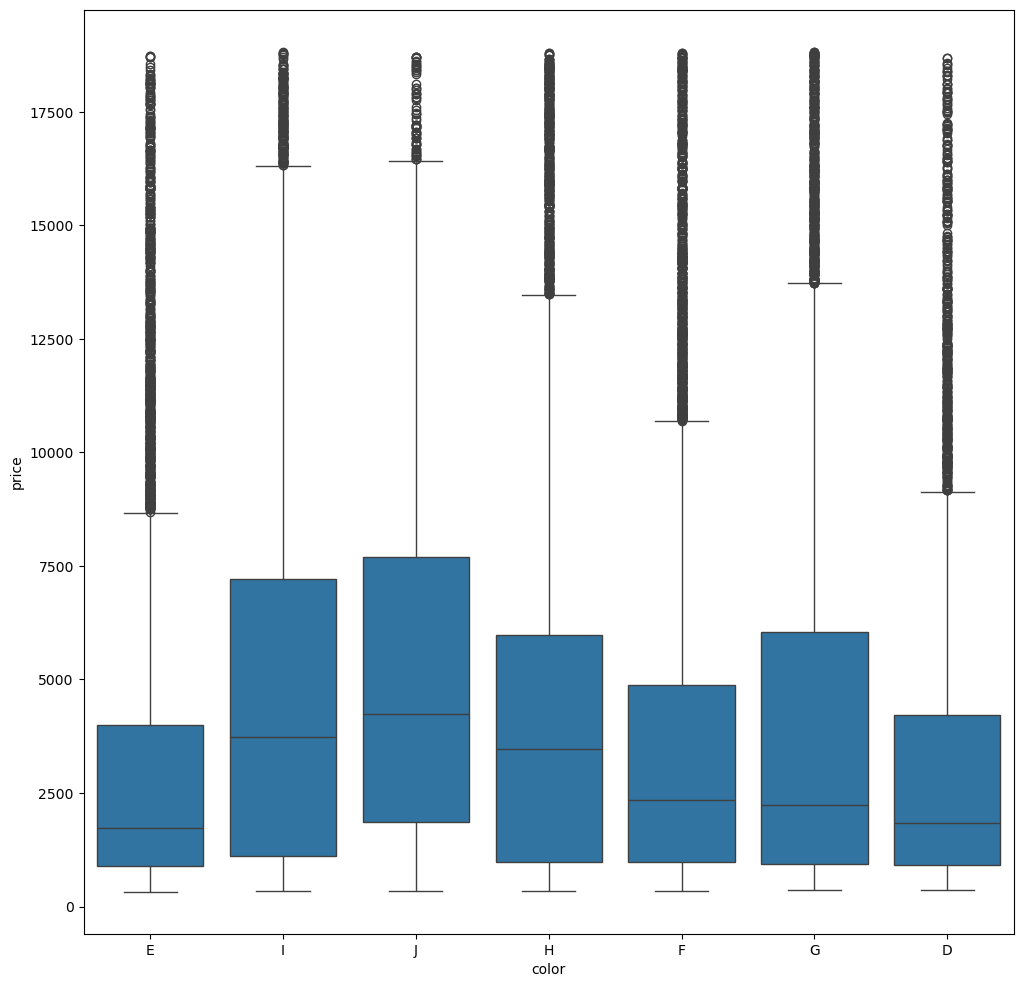

In [13]:
f, ax = plt.subplots(figsize=(12, 12))
fig = sns.boxplot(x='color', y='price', data=df)

In [14]:
df_d1=np.array(df[df['color']=='E']['price'])
df_d2=np.array(df[df['color']=='I']['price'])
df_d3=np.array(df[df['color']=='J']['price'])
df_d4=np.array(df[df['color']=='H']['price'])
df_d5=np.array(df[df['color']=='F']['price'])
df_d6=np.array(df[df['color']=='G']['price'])
df_d7=np.array(df[df['color']=='D']['price'])
print(stats.shapiro(df_d1))
print(stats.shapiro(df_d2))
print(stats.shapiro(df_d3))
print(stats.shapiro(df_d4))
print(stats.shapiro(df_d5))
print(stats.shapiro(df_d6))
print(stats.shapiro(df_d7))
stats.mstats.kruskalwallis(df_d1,df_d2,df_d3,df_d4,df_d5,df_d6,df_d7)

C:\ProgramData\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 9797.
  res = hypotest_fun_out(*samples, **kwds)
C:\ProgramData\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5422.
  res = hypotest_fun_out(*samples, **kwds)
C:\ProgramData\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8304.
  res = hypotest_fun_out(*samples, **kwds)
C:\ProgramData\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 9542.
  res = hypotest_fun_out(*samples, **kwds)
C:\ProgramData\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarn

ShapiroResult(statistic=0.7287370568942994, pvalue=8.708027711067628e-83)
ShapiroResult(statistic=0.8536194661541483, pvalue=2.0474923640254024e-57)
ShapiroResult(statistic=0.8894197512336367, pvalue=6.11382106170299e-41)
ShapiroResult(statistic=0.8413429468931239, pvalue=1.150856370487637e-67)
ShapiroResult(statistic=0.783865907813872, pvalue=3.581272453079654e-77)
ShapiroResult(statistic=0.8052362366103414, pvalue=9.618656533256523e-79)
ShapiroResult(statistic=0.743566752231625, pvalue=4.7376640109445266e-73)


KruskalResult(statistic=1335.570626350983, pvalue=2.1580813998043093e-285)

In [15]:
df.groupby('color')[['price']].count()

,price
color,
D,6775
E,9797
F,9542
G,11292
H,8304
I,5422
J,2808


In [16]:
df_d1=np.array(df[df['clarity']=='SI2']['price'])
df_d2=np.array(df[df['clarity']=='SI1']['price'])
df_d3=np.array(df[df['clarity']=='VS1']['price'])
df_d4=np.array(df[df['clarity']=='VS2']['price'])
df_d5=np.array(df[df['clarity']=='VVS2']['price'])
df_d6=np.array(df[df['clarity']=='VVS1']['price'])
df_d7=np.array(df[df['clarity']=='I1']['price'])
df_d8=np.array(df[df['clarity']=='IF']['price'])
print(stats.shapiro(df_d1))
print(stats.shapiro(df_d2))
print(stats.shapiro(df_d3))
print(stats.shapiro(df_d4))
print(stats.shapiro(df_d5))
print(stats.shapiro(df_d6))
print(stats.shapiro(df_d7))
print(stats.shapiro(df_d8))
stats.mstats.kruskalwallis(df_d1,df_d2,df_d3,df_d4,df_d5,df_d6,df_d7,df_d8)

C:\ProgramData\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 9194.
  res = hypotest_fun_out(*samples, **kwds)
C:\ProgramData\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 13065.
  res = hypotest_fun_out(*samples, **kwds)
C:\ProgramData\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8171.
  res = hypotest_fun_out(*samples, **kwds)
C:\ProgramData\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 12258.
  res = hypotest_fun_out(*samples, **kwds)
C:\ProgramData\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWa

ShapiroResult(statistic=0.8306187796145157, pvalue=3.4591301897864444e-71)
ShapiroResult(statistic=0.8131009514490928, pvalue=3.604779395723803e-81)
ShapiroResult(statistic=0.7928837224816878, pvalue=8.838565063397132e-73)
ShapiroResult(statistic=0.7955422607991064, pvalue=1.0451941115923772e-81)
ShapiroResult(statistic=0.7216614966454811, pvalue=2.7874013694469454e-68)
ShapiroResult(statistic=0.6017072462122205, pvalue=3.2569729068903924e-68)
ShapiroResult(statistic=0.8607966248192902, pvalue=4.452066673439499e-25)
ShapiroResult(statistic=0.5879537206175633, pvalue=5.1337502116257523e-54)


KruskalResult(statistic=2718.1865426181116, pvalue=0.0)

In [17]:
df.groupby('clarity')[['price']].count()

,price
clarity,
I1,741
IF,1790
SI1,13065
SI2,9194
VS1,8171
VS2,12258
VVS1,3655
VVS2,5066


из тепловой карты делаем вывод что в модель возьмем признак carat, который имеет большую корреляцию с ценой и признак x, признаки y,z не берем так как они имеют между собой большую корреляцию что может вызвать мультиколлинеарность, признаки derpt table тоже не берем тк имеет маленькую корреляцию с ценой.

после проверки 3 категориальных признака clarity cut color получилось, что имеют большое влияние, поэтому их нужно включить в модель

In [18]:
df = pd.concat([df, pd.get_dummies(df['cut'], prefix='cut')],axis=1)

In [19]:
df = pd.concat([df, pd.get_dummies(df['color'], prefix='color')],axis=1)

In [20]:
df = pd.concat([df, pd.get_dummies(df['clarity'], prefix='clarity')],axis=1)

In [21]:
df.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,...,False,False,False,False,False,True,False,False,False,False
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,...,False,False,False,False,True,False,False,False,False,False
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,...,False,False,False,False,False,False,True,False,False,False
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,...,True,False,False,False,False,False,False,True,False,False
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,...,False,True,False,False,False,True,False,False,False,False


In [11]:
df['price1']=(df['price'])**0.5
df['carat1']=np.log(df['carat'])**0.5
df['x1']=np.log(df['x'])**0.5
df.

C:\ProgramData\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Парная регрессия

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features=['carat','x','cut_Fair','cut_Good','cut_Ideal','cut_Premium','color_D','color_E','color_F','color_G','color_H','color_I','clarity_I1','clarity_IF','clarity_SI1','clarity_SI2','clarity_VS1','clarity_VS2','clarity_VVS1']
X= scaler.fit_transform(df[features])

In [23]:
from sklearn.model_selection import train_test_split
y=df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75,random_state=42)

In [24]:
y_train.shape, y_test.shape

((40455,), (13485,))

In [25]:
model = LinearRegression()
model.fit(X_train, y_train)
y_train_prediction = model.predict(X_train)
y_test_prediction = model.predict(X_test)

In [26]:
print('Train MSE: ', mean_squared_error(y_train, y_train_prediction))
print('Test MSE: ', mean_squared_error(y_test, y_test_prediction))

print('Train MAE: ', mean_absolute_error(y_train, y_train_prediction))
print('Test MAE: ', mean_absolute_error(y_test, y_test_prediction))

print('Train R^2: ', model.score(X_train,y_train ))
print('Test R^2: ', model.score(X_test,y_test ))

Train MSE:  1287573.8409768292
Test MSE:  1270333.698741631
Train MAE:  749.0794766984536
Test MAE:  741.1537386620113
Train R^2:  0.9194435737477699
Test R^2:  0.919136943555245
